In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import utils

# Data loading and preprocessing

Text(0.5, 1.0, 'S1')

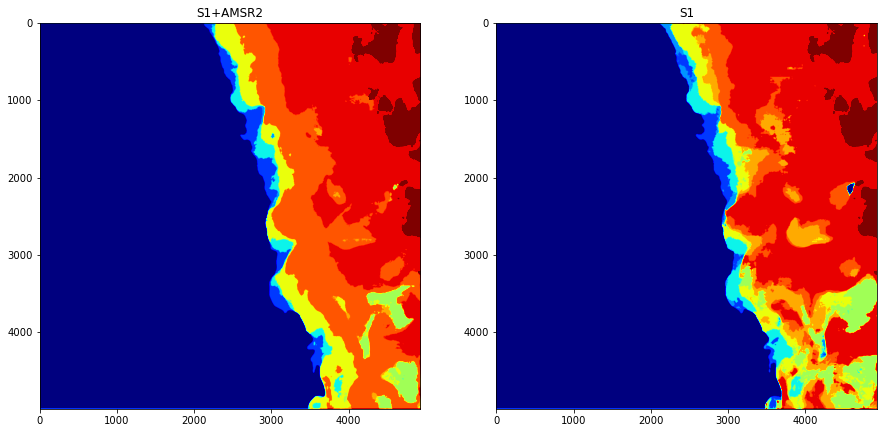

In [2]:
chart1 = gdal.Open('S1B_EW_GRDM_1SDH_20211102T075505_20211102T075605_029406_038267_1FE7.SAFE_prediction_s1amsr2.tiff').ReadAsArray()[:, 150:-150]
chart2 = gdal.Open('S1B_EW_GRDM_1SDH_20211102T075505_20211102T075605_029406_038267_1FE7.SAFE_prediction_s1.tiff').ReadAsArray()[:, 150:-150]
pixel_spacing = 80 # ASIP products are generated in 80m pixel spacing

# dark red color is the Greenland coast
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(chart1, vmin=0, vmax=110, cmap='jet'); ax[0].set_title('S1+AMSR2')
ax[1].imshow(chart2, vmin=0, vmax=110, cmap='jet'); ax[1].set_title('S1')

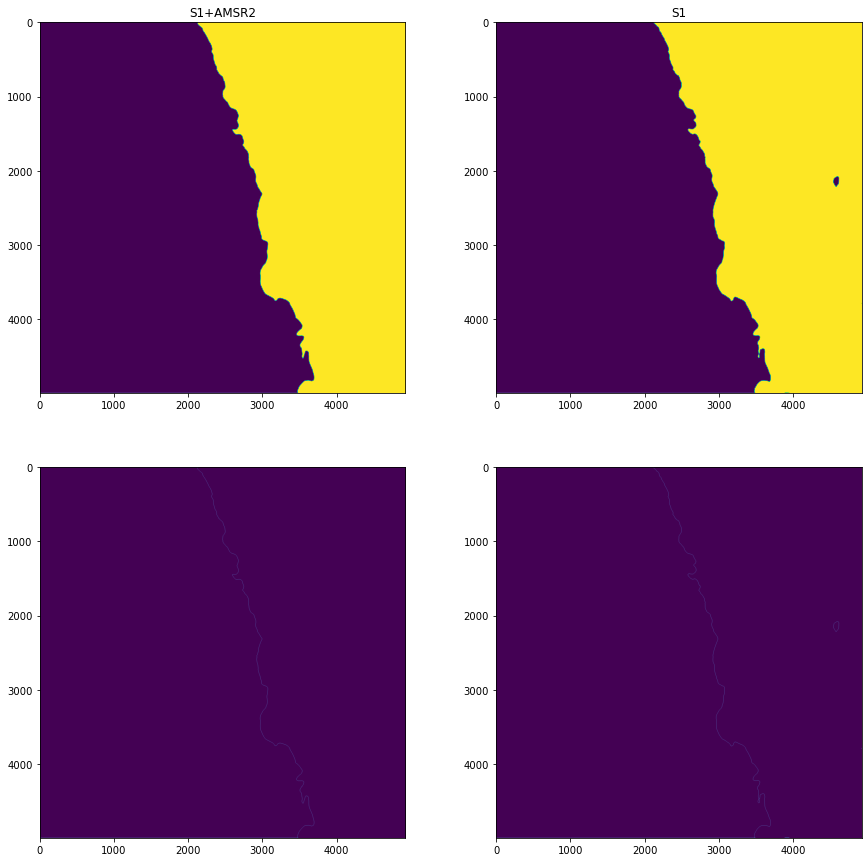

In [3]:
landmask = chart1 == 255 # not needed in this case, but a landmask is often required to remove detected edges along the coastline
# Binarizing charts
chart1 = np.where(chart1 > 0, 1, 0)
chart2 = np.where(chart2 > 0, 1, 0)

# Extracting ice edges from the charts
edge1 = utils.extract_edge(chart1)
edge2 = utils.extract_edge(chart2)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].imshow(chart1); ax[0][0].set_title('S1+AMSR2')
ax[0][1].imshow(chart2); ax[0][1].set_title('S1')
ax[1][0].imshow(edge1)
ax[1][1].imshow(edge2)

# Integrated Ice Edge Error (IIEE)

In [4]:
IIEE_area = utils.compute_IIEE_area(chart1, chart2, pixel_spacing=pixel_spacing)
edge_length1 = utils.compute_edge_length(edge1, pixel_spacing=pixel_spacing)
edge_length2 = utils.compute_edge_length(edge2, pixel_spacing=pixel_spacing)
IIEE = 2/(edge_length1 + edge_length2)*IIEE_area

print('Integrated Ice Edge Error: {:.2f} m'.format(IIEE))

Integrated Ice Edge Error: 225.47 m


# Average Ice Edge Displacement

In [6]:
avg_dis = utils.compute_avg_displacement(edge1, edge2, pixel_spacing=pixel_spacing)

print('Average Ice Edge Displacement: {:.2f} m'.format(avg_dis))

Average Ice Edge Displacement: 1994.72 m


## In os.copernicus.org/articles/15/615/2019/ it is recommended to use the two above metrics as lower and upper bounds, respectively.